In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Parameter values

t = 15
alpha=1/3
beta= 0.98
delta=0.04

# Steady State Values

w_bar = lambda alpha, beta: (1-alpha) ** (1/(1-alpha)) * (beta/(1+beta)) ** (alpha/(1-alpha))
r_bar = lambda alpha, beta: (1+beta)/beta * alpha/(1-alpha)

# Initial Values for interest rate and wage vectors

r_0=r_bar(alpha,beta)
w_0=w_bar(alpha,beta)

#Production Function

output = lambda K,L,alpha: K ** alpha * (L) ** (1-alpha)
wage_pres = lambda wage_past, alpha, beta: (1-alpha) * (beta/(1+beta) * wage_past) ** alpha  #path of wage
int_pres = lambda wage_past, alpha, beta: alpha / ((beta/(1+beta) * wage_past) ** (1-alpha)) #path of interest
#Preallocating arrays and initial values.


w = np.array([w_0])
r = np.array([r_0])

c_1 = np.array ([w_0/(1+beta)]) #starts from optimal formula
c_2 = np.array([(1+r_0-delta)*beta/(1+beta)*w_0]) #starts from optimal formula 
k_2 = np.array([beta/(1+beta)*w_0]) #starts from optimal formula
K = k_2
Y = output(K,1,alpha)

alpha= np.ones(t) *alpha #making an array for alpha timeline for changes
beta = np.ones(t) * beta 
delta = np.ones(t) * delta 

beta[8:15] = 0.98/2  #shocks from period 9
print(beta)

[0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.49 0.49 0.49 0.49 0.49 0.49
 0.49]


In [5]:
i = 0 #Start counter

for i in range(0,t-1):
    i += 1
    w = np.append(w, wage_pres(w[i-1],alpha[i],beta[i])) #Path of wages
    r = np.append(r, int_pres(w[i-1],alpha[i],beta[i])) #Path of interest rate
    k_2 = np.append(k_2,[beta[i]/(1+beta[i])*w[i-1]])
    c_1 = np.append(c_1,[w[i]/(1+beta[i])])
    c_2 = np.append(c_2,[(1+r[i]-delta[i])*beta[i]/(1+beta[i])*w[i]])
#    k_2 = np.append(k_2,[beta[i]/(1+beta[i])*w[i]]) #why not i-1 ? is it because wt = w_bar ?  ###########
    Y = np.append(Y,output(k_2[i],1,alpha[i]))    
    

time=np.linspace(0,t-1,t)   


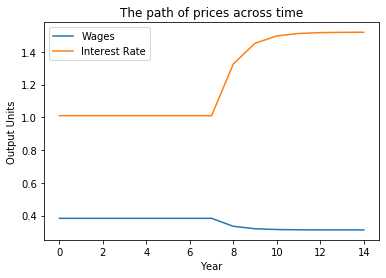

In [6]:
plt.plot(time,w, label='Wages')
plt.plot(time,r, label='Interest Rate')
plt.xlabel('Year')
plt.ylabel('Output Units')
plt.title('The path of prices across time')
plt.legend()
plt.show()

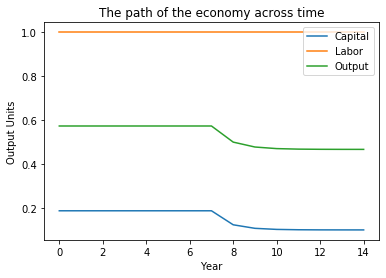

In [7]:
plt.plot(time,k_2, label='Capital')
plt.plot(time,np.ones(t), label='Labor')
plt.plot(time,Y, label='Output')
plt.xlabel('Year')
plt.ylabel('Output Units')
plt.title('The path of the economy across time')
plt.legend()
plt.show()

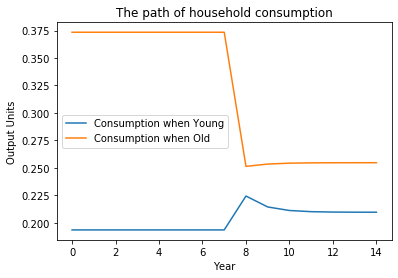

In [8]:
plt.plot(time,c_1, label='Consumption when Young')
plt.plot(time,c_2, label='Consumption when Old')
plt.xlabel('Year')
plt.ylabel('Output Units')
plt.title('The path of household consumption')
plt.legend()
plt.show()